# Test statistique

Un test statistique est réalisé à la suite d'une question scientifique. Nous souhaitons répondre à cette question en généralisant sur une population visée alors que nous ne possédons qu'un petit échantillon. Cette généralisation comporte des riques et grâce au test statistique, nous sommes capable de les évaluer.

## Définition en statistique

- Population : Ensemble des individus dont nous souhaitons obtenir une information. Les individus doivent petre distinguables sans ambiguïté.
- Echantillon : Sous ensemble de la population visée. Pour être représentatif, il doit être contruit aléatoirement. 
- Variable aléatoire : Observation qui prend différentes valeurs en fonction de l'échantillon 

## Etapes d'un test statistique 

Un test statistique se décompose en 4 grandes étapes : 

1. Poser les deux hypothèse statistiques
2. Calculer la variable de test
3. Utiliser la variable de test calculéee pour déterminer la *p-value*
4. En fonction de cette p-value, conclure sur les deux hypothèses posées

### Les deux hypothèse statistiques 

Elles sont liée à la question scientifique. Ces deux hypothèses sont deux réponses possibles et exclusives de cette question. 

- H0 : hypothèse nulle (principale). Généralement, l'hypothèse que nous souhaitons rejeter
- H1 : hypothèse alternative. Généralement, l'hypothèse que nous souhaitons vrai car elle montre une différence

### La variable de test 

Il s'agit d'un systeme de calcul utilisé par un test statistique qui permet de trancher entre les deux hypothèses. Il s'agit d'une formule mathématique appliquée à un échantillon. Par exemple pour le test de Student :

$$t = \frac{m_{h} - m_{theo}}{\frac{S_{h}}{\sqrt{n}}}$$

avec 
- $t$ : Variable de test calculée
- $m_{h}$ : moyenne de l'échantillon
- $m_{theo}$ : moyenne théorique 
- $n$ : effectif de l'achantillon
- $S_{h}$ : écart type non biaisé des valeurs de l'échantillon
- $v$ : degrés de liverté (ddl) v = n -1

Cette variable de test va varier en fonction de l'échantillon. Il s'agit d'une variable aléatoire.

## Répondre à la question scientifique

### Notion de risque

Le test statistique permet de trancher entre H0 et H1. Il y a cependant deux risques :
- le risque $\alpha$ ou risque de 1ère espèce : rejet de H0 alors que H0 est vraie
- le risque $\beta$ ou risque de 2ème espèce : rejet de H1 alors que H1 est vraie (acceptation de H0 alors que H0 est fausse)

**Cas 1** 

La différence observée lors du test est due unuquement à la fluctuation d'échantillonage et n'est pas propre à la population visée. La différence n'est pas significative. H0 est vraie pour la population étudiée. Le risque d'erreur est $\beta$.

**Cas 2**

La différence observée n'est pas la conséquence de la fluctuation de l'échantillonage. Il existe réellement une différence avec la population étudiée. La différence est fignificative. H0 est rejeté avec un risque $\beta$.

### Différence entre risque $\alpha$ et seuil $\alpha$
Le risque $\alpha$ équivaut à la *p-value*. 

Le seuil $\alpha$ correspond au seuil de rejet ou seuil de siginficativité de l'hypothèse H0. Une valeur de *p-value* est fixée avant le test statistique. En dessous de cette valeur, H0 est rejetté : 

- $p-value \leq \alpha_{seuil}$ : H0 est rejettée et H1 est acceptée
- $p > \alpha_{seuil}$ : H0 n'est pas rejetté et H1 n'est pas acceptée

Par défaut se seuil est fixé à 5% (0.05). Ce seuil change en fonction du risque que nous souhaitons prendre. 

**Important** : le seuil doit être fixé avant de réaliser le test statistique et de connaître la *p-value*. Comment justifier un changement de seuil s'il ne vous convient pas une fois que vous avez la *p-value*?

### Le risque $\beta$ et la puissance 

Le risque $\beta$ est le risque de se tromper lorsque H1 est rejetté alors que H1 est vraie. La puissance d'un test est la probabilité associée au fait de rejeter H0 alors que H0 est fausse. En résumé, la puissance c'est d'avoir fait le bon choix en rejetant H0. la puissance est égale à $1-\beta$. 

## Simulation 

### Installation des packages

In [1]:
install.packages("tidyverse")
install.packages("dplyr")
install.packages("gridExtra")
install.packages("cowplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Chargement des libraries

In [3]:
library("tidyverse")
library("dplyr")
library("gridExtra")
library("cowplot")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.0     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



## Import des fonctions 

In [11]:
source("fonctions.R", encoding="utf-8")

## Lecture des données

In [12]:
pop0 = runif(n = 10000,min = 0,max = 300)
# saveRDS(pop0, file = "pop0.rds")
# pop0 = readRDS(file = "pop0.rds")

popA = rnorm(n = 10000,mean = 150, sd = 20)
popB = rnorm(n = 10000,mean = 180, sd = 20)
popC = rnorm(n = 10000,mean = 160, sd = 20)

## Etude de la population 0
### Echantillonage

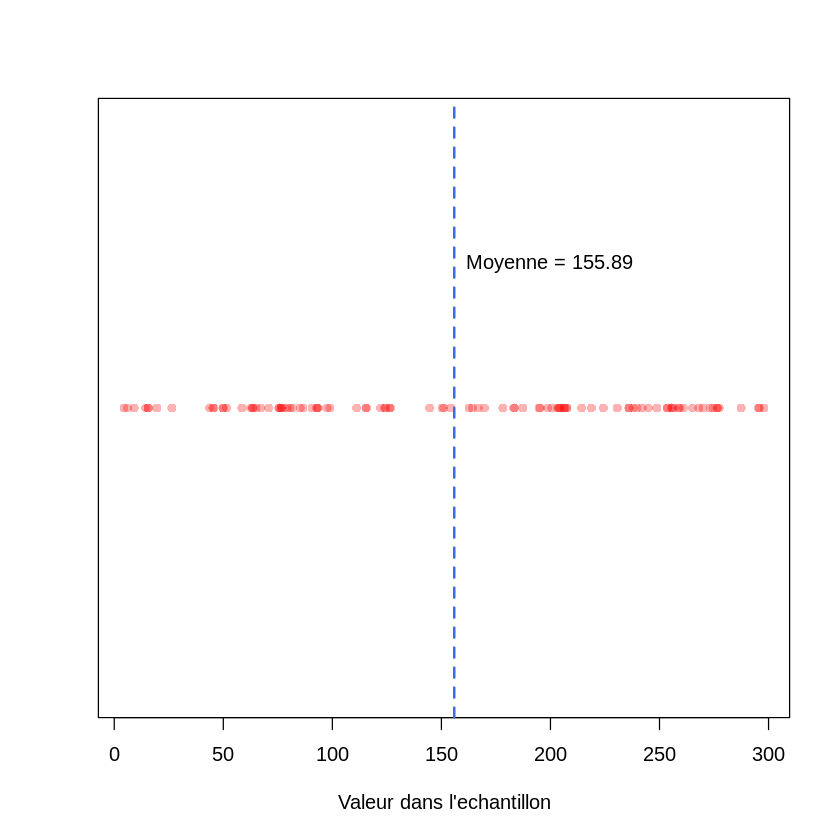

In [13]:
ech0 = echantillonage(population = pop0, taille = 100)

### Echantillonage multiple
#### Sans valeur de référence

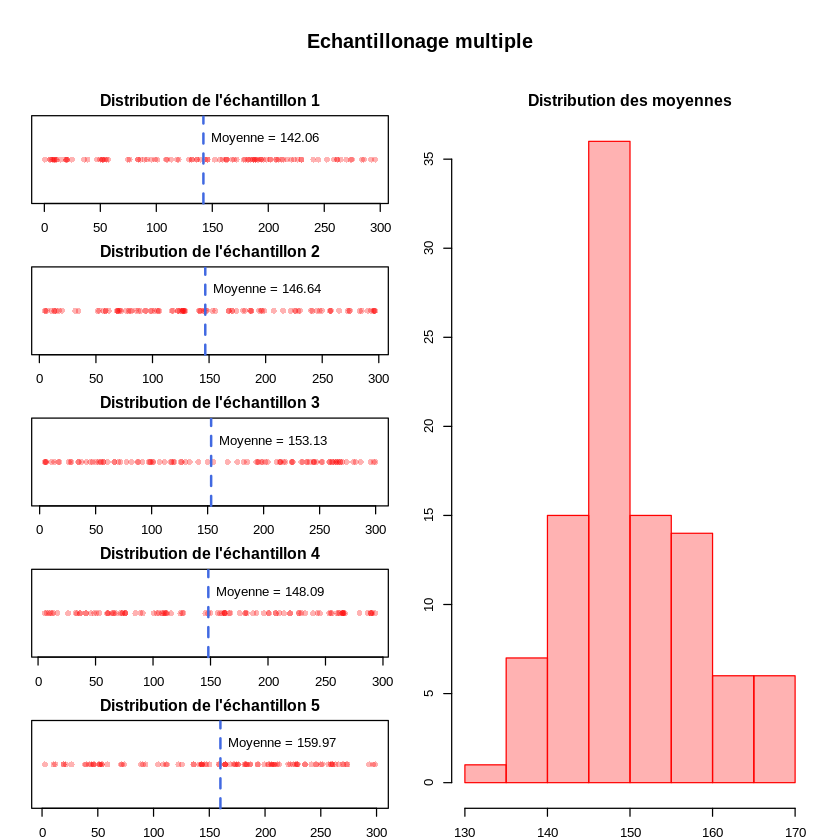

In [16]:
vecteurMoyenne = echantillonageMultiple(population = pop0, taille = 100, 
                                        nbEchantillon = 100)

#### Avec une valeur de référence

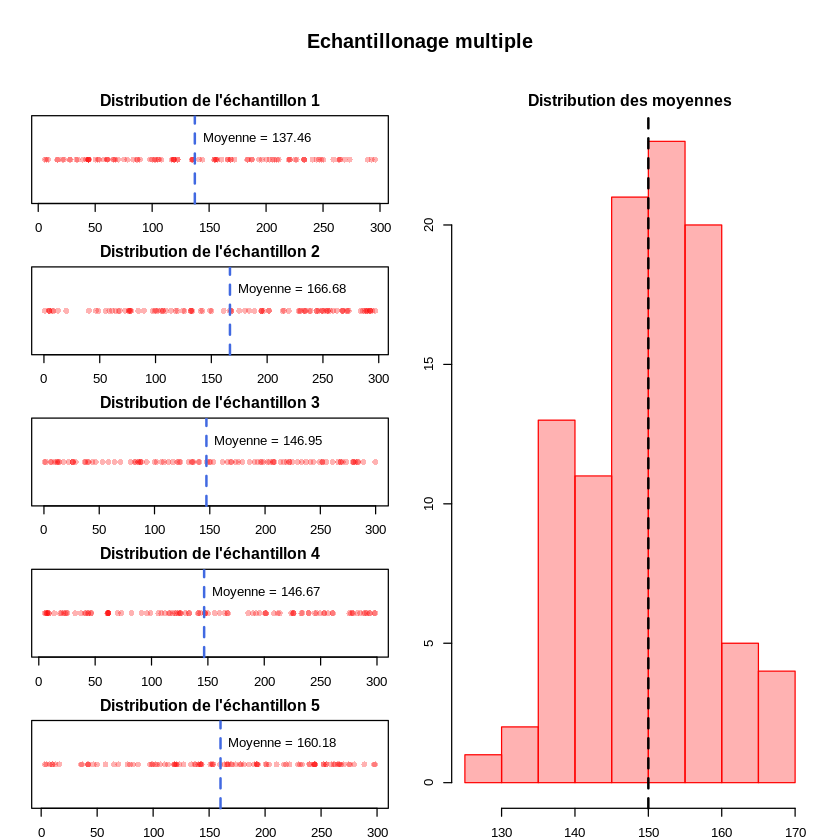

In [15]:
vecteurMoyenne = echantillonageMultiple(population = pop0, taille = 100, 
                                        nbEchantillon = 100, valeurRef = 150)

In [18]:
### Distribution de la population 0

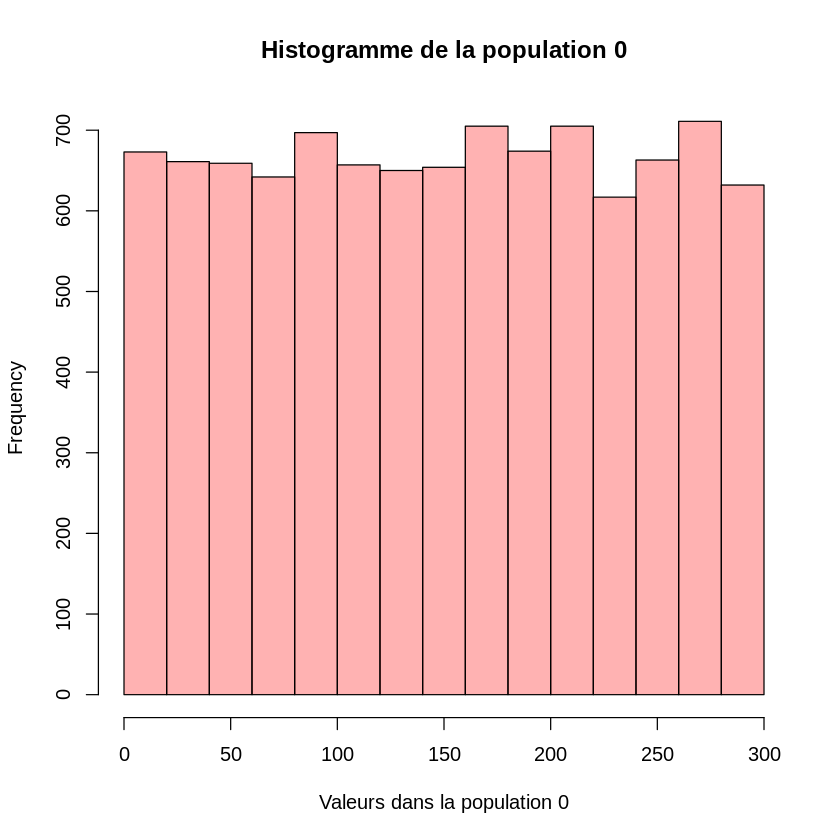

In [17]:
hist(pop0, main ="Histogramme de la population 0", 
     col = adjustcolor("red", alpha.f = 0.3), 
     xlab = "Valeurs dans la population 0")

## Ressources 
**Comprendre et réaliser les tests statistiques à l'aide de R - Manuel de biostatistique** - Gaël Millot - 3ème édition de boeck